# Início 

## Importação de Bibliotecas

In [150]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd
import scipy
from math import sqrt

# Módulos gráficos
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns

# Modelos de Modelagem
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Trabalhar com datas
import datetime

# Ler arquivos em .rds
#import pyreadr

Carregar base em `.rds` no python: https://stackoverflow.com/questions/40996175/loading-a-rds-file-in-pandas

## Importação da Base de Dados

A base de dados utilizada está no arquivo `df_RNA2.xlsx` por se tratar de uma adap

In [2]:
df = pd.read_excel('df_RNA2.xlsx')

In [3]:
df.head()

,date,M1,M2,M3,M6,M9,M12,M24,M36,M48,...,M48_t-4,M48_t-5,M60_t-1,M60_t-2,M60_t-3,M60_t-4,M60_t-5,M3_1mo,M3_6mo,M3_12mo
0,02-01-2006,15.187812,18.786121,17.357539,17.149275,16.809051,16.600694,16.110294,15.692012,15.483627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.900120,14.728772,12.843980
1,03-01-2006,19.247014,17.646985,17.492553,17.147804,16.793381,16.592678,16.107679,15.682697,15.484655,...,NaN,NaN,15.263846,NaN,NaN,NaN,NaN,16.962300,14.709821,12.818469
2,04-01-2006,18.609500,17.610721,17.473891,17.120790,16.771940,16.571993,16.049379,15.532499,15.273173,...,NaN,NaN,15.307728,15.263846,NaN,NaN,NaN,16.862876,14.650871,12.798996
3,05-01-2006,17.980529,17.604723,17.469122,17.119066,16.767030,16.557496,16.051226,15.532270,15.283694,...,NaN,NaN,15.050328,15.307728,15.263846,NaN,NaN,16.789077,14.656526,12.806048
4,06-01-2006,18.087331,17.620898,17.435379,17.090429,16.731085,16.526274,16.028723,15.524369,15.272630,...,15.483627,NaN,15.066758,15.050328,15.307728,15.263846,NaN,16.824422,14.621504,12.817700


In [4]:
df.dtypes

date        object
M1         float64
M2         float64
M3         float64
M6         float64
            ...   
M60_t-4    float64
M60_t-5    float64
M3_1mo     float64
M3_6mo     float64
M3_12mo    float64
Length: 64, dtype: object

A base necessita de duas alterações:
- As datas devem ser transformadas no index já que não farão parte dos _inputs_;
- Teremos que dropar as linhas que possuem ausência de informações para que seja possível rodar o modelo.

In [5]:
# Transformando coluna de datas em index
df = df.set_index('date')

In [6]:
# Drop em NaN
df = df.dropna()

In [7]:
df.head()

,M1,M2,M3,M6,M9,M12,M24,M36,M48,M60,...,M48_t-4,M48_t-5,M60_t-1,M60_t-2,M60_t-3,M60_t-4,M60_t-5,M3_1mo,M3_6mo,M3_12mo
date,,,,,,,,,,,,,,,,,,,,,
09-01-2006,17.740182,17.566360,17.399818,17.059122,16.705152,16.488824,15.961299,15.491930,15.255337,15.036384,...,15.484655,15.483627,15.040560,15.066758,15.050328,15.307728,15.263846,16.786434,14.587978,12.789329
10-01-2006,17.645399,17.503714,17.343773,16.946689,16.599468,16.381932,15.858515,15.423501,15.224757,14.974188,...,15.273173,15.484655,15.036384,15.040560,15.066758,15.050328,15.307728,16.790069,14.579063,12.790458
11-01-2006,17.559551,17.497823,17.325622,16.950004,16.602846,16.379841,15.819653,15.403037,15.168945,14.944059,...,15.283694,15.273173,14.974188,15.036384,15.040560,15.066758,15.050328,16.770746,14.539128,12.768769
12-01-2006,17.499928,17.456166,17.287956,16.910126,16.565996,16.346437,15.800996,15.361025,15.111922,14.873235,...,15.272630,15.283694,14.944059,14.974188,15.036384,15.040560,15.066758,16.739506,14.526906,12.755620
13-01-2006,17.439030,17.431589,17.260307,16.894521,16.518858,16.299075,15.714698,15.287913,15.037662,14.803268,...,15.255337,15.272630,14.873235,14.944059,14.974188,15.036384,15.040560,16.714418,14.523502,12.745142


In [8]:
df.tail()

,M1,M2,M3,M6,M9,M12,M24,M36,M48,M60,...,M48_t-4,M48_t-5,M60_t-1,M60_t-2,M60_t-3,M60_t-4,M60_t-5,M3_1mo,M3_6mo,M3_12mo
date,,,,,,,,,,,,,,,,,,,,,
02-12-2019,4.645610,4.600468,4.551557,4.497877,4.515069,4.487397,4.958352,5.430931,5.835493,6.098868,...,5.831422,5.771047,6.035826,6.034707,6.134388,6.134302,6.083230,4.357045,2.187207,1.935254
03-12-2019,4.609498,4.565870,4.525098,4.466398,4.487144,4.480704,4.928258,5.381433,5.765281,6.049449,...,5.835979,5.831422,6.098868,6.035826,6.034707,6.134388,6.134302,4.345652,2.156528,1.931816
04-12-2019,4.595433,4.541804,4.506271,4.439909,4.436596,4.522202,4.879505,5.314731,5.703581,5.971609,...,5.749511,5.835979,6.049449,6.098868,6.035826,6.034707,6.134388,4.327281,2.121856,1.933921
05-12-2019,4.580626,4.536615,4.500237,4.440265,4.451968,4.541902,4.911188,5.346159,5.717186,5.991164,...,5.746462,5.749511,5.971609,6.049449,6.098868,6.035826,6.034707,4.322981,2.116789,1.932001
06-12-2019,4.538259,4.495592,4.461978,4.399887,4.398406,4.482015,4.804700,5.209372,5.595909,5.884979,...,5.835493,5.746462,5.991164,5.971609,6.049449,6.098868,6.035826,4.333122,2.115466,1.925101


In [9]:
df.shape

(3438, 63)

# Análise Exploratória

In [10]:
# Estabelecer base com taxas originais
df_og = df[['M1', 'M2', 'M3', 'M6', 'M9', 'M12', 'M24', 'M36', 'M48', 'M60']]

# Cálculo
df_og.corr()

,M1,M2,M3,M6,M9,M12,M24,M36,M48,M60
M1,1.000000,0.998143,0.996507,0.986070,0.972016,0.957486,0.904820,0.868261,0.842068,0.824949
M2,0.998143,1.000000,0.999356,0.991712,0.979697,0.966574,0.916645,0.880712,0.854459,0.836908
M3,0.996507,0.999356,1.000000,0.995455,0.985698,0.974178,0.927512,0.892505,0.866404,0.848524
M6,0.986070,0.991712,0.995455,1.000000,0.997098,0.990681,0.955036,0.923594,0.898462,0.880119
M9,0.972016,0.979697,0.985698,0.997098,1.000000,0.998075,0.973133,0.945914,0.922536,0.904526
M12,0.957486,0.966574,0.974178,0.990681,0.998075,1.000000,0.984872,0.961945,0.940589,0.923236
M24,0.904820,0.916645,0.927512,0.955036,0.973133,0.984872,1.000000,0.993458,0.981171,0.968444
M36,0.868261,0.880712,0.892505,0.923594,0.945914,0.961945,0.993458,1.000000,0.996446,0.989327
M48,0.842068,0.854459,0.866404,0.898462,0.922536,0.940589,0.981171,0.996446,1.000000,0.997831
M60,0.824949,0.836908,0.848524,0.880119,0.904526,0.923236,0.968444,0.989327,0.997831,1.000000


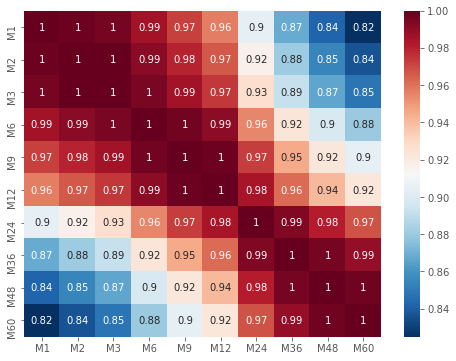

In [152]:
# Heatmap
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_og.corr(), annot = True, cmap = 'RdBu_r');
fig.savefig('cor_matrix.pdf', bbox_inches='tight')

In [12]:
df_og.describe()

,M1,M2,M3,M6,M9,M12,M24,M36,M48,M60
count,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000
mean,10.580934,10.566834,10.557407,10.561451,10.587664,10.625566,10.899636,11.178526,11.371473,11.519167
std,2.808338,2.800656,2.798278,2.793596,2.790668,2.780891,2.669858,2.490833,2.342084,2.219976
min,4.538259,4.495592,4.461978,4.399887,4.390760,4.315638,4.424880,4.763874,5.142862,5.472011
25%,8.427161,8.385075,8.387404,8.440057,8.430186,8.413200,8.719962,9.341675,9.707120,9.999415
50%,10.820270,10.818090,10.819705,10.866174,10.908167,10.983553,11.250403,11.578062,11.716288,11.817345
75%,12.707308,12.682499,12.691456,12.699955,12.661145,12.663744,12.672716,12.700485,12.690631,12.693032
max,20.709902,17.566360,17.399818,17.059122,16.705152,16.488824,17.022675,17.487048,17.872431,17.910060


In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (20, 5))

ax1.plot(df['M1'], color = 'blue');
ax1.title.set_text('M1');

ax2.plot(df['M2'], color = 'blue');
ax2.title.set_text('M2');

ax3.plot(df['M3'], color = 'blue');
ax3.title.set_text('M3');

ax4.plot(df['M6'], color = 'blue');
ax4.title.set_text('M6');

ax5.plot(df['M9'], color = 'blue');
ax5.title.set_text('M9');

ax6.plot(df['M12'], color = 'blue');
ax6.title.set_text('M12');

ax7.plot(df['M24'], color = 'blue');
ax7.title.set_text('M24');

ax8.plot(df['M36'], color = 'blue');
ax8.title.set_text('M36');

ax9.plot(df['M48'], color = 'blue');
ax9.title.set_text('M48');

ax10.plot(df['M60'], color = 'blue');
ax10.title.set_text('M60');

In [ ]:
plt.scatter(df['M1'], df['M2']);

# Rede Neural

## Divisão da Base

In [13]:
df.shape

(3438, 63)

A fim de igualar o período de teste para o DNS e o MLP, a divisão será realizada tendo como base o intervalo observado para o DNS.

- Tamanho da base: 3702
- 70% da base: 2592
- 30% da base: 1110

__teste__: 0 ~ 2592 <br>
__treino__: 2593 ~ 3701

In [14]:
df_train = df[0:2592]
df_test = df[2593:]

https://www.tensorflow.org/tutorials/structured_data/time_series

## Preparação dos dados

Os dados precisam passar por alguns processos de preparação:
- Transformar variáveis em _arrays_
- Normalização dos dados

### Predição de M3

In [21]:
# Variáveis explicativas
x_train = df_train[['M1_t-1', 'M1_t-2', 'M1_t-3', 'M1_t-4', 'M1_t-5', 'M2_t-1', 'M2_t-2', 'M2_t-3', 'M2_t-4', 'M2_t-5', 'M3_t-1', 'M3_t-2', 'M3_t-3', 'M3_t-4', 'M3_t-5', 'M6_t-1', 'M6_t-2', 'M6_t-3', 'M6_t-4', 'M6_t-5', 'M9_t-1', 'M9_t-2', 'M9_t-3', 'M9_t-4', 'M9_t-5', 'M12_t-1', 'M12_t-2', 'M12_t-3', 'M12_t-4', 'M12_t-5', 'M24_t-1', 'M24_t-2', 'M24_t-3', 'M24_t-4', 'M24_t-5', 'M36_t-1', 'M36_t-2', 'M36_t-3', 'M36_t-4', 'M36_t-5', 'M48_t-1', 'M48_t-2', 'M48_t-3', 'M48_t-4', 'M48_t-5', 'M60_t-1', 'M60_t-2', 'M60_t-3', 'M60_t-4', 'M60_t-5']]
x_train = x_train.to_numpy()

x_test = df_test[['M1_t-1', 'M1_t-2', 'M1_t-3', 'M1_t-4', 'M1_t-5', 'M2_t-1', 'M2_t-2', 'M2_t-3', 'M2_t-4', 'M2_t-5', 'M3_t-1', 'M3_t-2', 'M3_t-3', 'M3_t-4', 'M3_t-5', 'M6_t-1', 'M6_t-2', 'M6_t-3', 'M6_t-4', 'M6_t-5', 'M9_t-1', 'M9_t-2', 'M9_t-3', 'M9_t-4', 'M9_t-5', 'M12_t-1', 'M12_t-2', 'M12_t-3', 'M12_t-4', 'M12_t-5', 'M24_t-1', 'M24_t-2', 'M24_t-3', 'M24_t-4', 'M24_t-5', 'M36_t-1', 'M36_t-2', 'M36_t-3', 'M36_t-4', 'M36_t-5', 'M48_t-1', 'M48_t-2', 'M48_t-3', 'M48_t-4', 'M48_t-5', 'M60_t-1', 'M60_t-2', 'M60_t-3', 'M60_t-4', 'M60_t-5']]
x_test = x_test.to_numpy()



# Variável dependente
y_train = df_train['M3_1mo']
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1, 1)

y_test = df_test['M3_1mo']
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

#### Normalização

In [22]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#### Definição de RNA MLP

In [100]:
model = keras.Sequential()

# Camada Input
model.add(
    layers.Flatten(input_shape = x_train.shape[1:]
                  ))

# Camada Oculta
model.add(layers.Dense(20,
                       activation = 'relu',
                       kernel_regularizer = keras.regularizers.l2(l2 = 0.001)))

#model.add(layers.Dropout(0.30))

model.add(layers.Dense(20,
                       activation = 'relu',
                       kernel_regularizer = keras.regularizers.l2(l2 = 0.001)))

#model.add(layers.Dropout(0.10))

model.add(layers.Dense(20,
                       activation = 'relu',
                       kernel_regularizer = keras.regularizers.l2(l2 = 0.001)))

#model.add(layers.Dropout(0.20))

model.add(layers.Dense(20,
                       activation = 'relu',
                       kernel_regularizer = keras.regularizers.l2(l2 = 0.001)))

#model.add(layers.Dropout(0.20))

model.add(layers.Dense(4,
                       activation = 'relu',
                       kernel_regularizer = keras.regularizers.l2(l2 = 0.001)))


# Camada Output
model.add(layers.Dense(1,
                       activation = 'relu'
                      ))

model.compile(loss = 'mean_squared_error',
              optimizer = keras.optimizers.Adam(), 
              metrics = [keras.metrics.RootMeanSquaredError()]
             )

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 50)                0         
                                                                 
 dense_80 (Dense)            (None, 20)                1020      
                                                                 
 dense_81 (Dense)            (None, 20)                420       
                                                                 
 dense_82 (Dense)            (None, 20)                420       
                                                                 
 dense_83 (Dense)            (None, 20)                420       
                                                                 
 dense_84 (Dense)            (None, 4)                 84        
                                                                 
 dense_85 (Dense)            (None, 1)               

#### Treino de RNA MLP

In [101]:
callback = keras.callbacks.EarlyStopping(monitor = 'root_mean_squared_error',
                                         patience = 100)

historico = model.fit(x = x_train_scaled, 
                      y = y_train_scaled,
                      epochs = 500,
                      batch_size = 100,
                      validation_split = 0.2,
                      callbacks = callback)

Epoch 1/500
21/21 [==============================] - 1s 7ms/step - loss: 1.0830 - root_mean_squared_error: 0.9976 - val_loss: 1.1051 - val_root_mean_squared_error: 1.0116
Epoch 2/500
21/21 [==============================] - 0s 2ms/step - loss: 1.0710 - root_mean_squared_error: 0.9971 - val_loss: 1.0946 - val_root_mean_squared_error: 1.0116
Epoch 3/500
21/21 [==============================] - 0s 2ms/step - loss: 1.0611 - root_mean_squared_error: 0.9971 - val_loss: 1.0854 - val_root_mean_squared_error: 1.0116
Epoch 4/500
21/21 [==============================] - 0s 2ms/step - loss: 1.0524 - root_mean_squared_error: 0.9971 - val_loss: 1.0773 - val_root_mean_squared_error: 1.0116
Epoch 5/500
21/21 [==============================] - 0s 2ms/step - loss: 1.0448 - root_mean_squared_error: 0.9971 - val_loss: 1.0703 - val_root_mean_squared_error: 1.0116
Epoch 6/500
21/21 [==============================] - 0s 2ms/step - loss: 1.0383 - root_mean_squared_error: 0.9971 - val_loss: 1.0642 - val_root_m

In [102]:
score_train, rmse_train = model.evaluate(x_train_scaled, y_train_scaled, verbose = 0)
score_test, rmse_test = model.evaluate(x_test_scaled, y_test_scaled, verbose = 0)

print('Desempenho no conjunto de Treino: {:.2}'.format(rmse_train))
print('Desempenho no conjunto de Teste: {:.2}'.format(rmse_test))

Desempenho no conjunto de Treino: 1.0
Desempenho no conjunto de Teste: 1.9


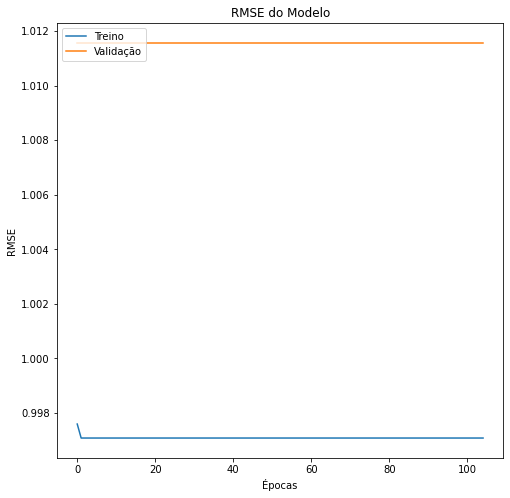

In [103]:
# Gráfico com a evolução do treinamento
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(historico.history['root_mean_squared_error'])
plt.plot(historico.history['val_root_mean_squared_error'])
plt.title('RMSE do Modelo')
plt.ylabel('RMSE')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

In [95]:
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x00000230D95528E0>>

### Treino de MLP apenas com valores passados da variável

Previsão de M3

In [136]:
# Variáveis explicativas

# 'M1_t-1', 'M1_t-2', 'M1_t-3', 'M1_t-4', 'M1_t-5', 'M2_t-1', 'M2_t-2', 'M2_t-3', 'M2_t-4', 'M2_t-5', 'M3_t-1', 'M3_t-2', 'M3_t-3', 'M3_t-4', 'M3_t-5', 'M6_t-1', 'M6_t-2', 'M6_t-3', 'M6_t-4', 'M6_t-5', 'M9_t-1', 'M9_t-2', 'M9_t-3', 'M9_t-4', 'M9_t-5', 'M12_t-1', 'M12_t-2', 'M12_t-3', 'M12_t-4', 'M12_t-5', 'M24_t-1', 'M24_t-2', 'M24_t-3', 'M24_t-4', 'M24_t-5', 'M36_t-1', 'M36_t-2', 'M36_t-3', 'M36_t-4', 'M36_t-5', 'M48_t-1', 'M48_t-2', 'M48_t-3', 'M48_t-4', 'M48_t-5', 'M60_t-1', 'M60_t-2', 'M60_t-3', 'M60_t-4', 'M60_t-5'

x_train = df_train[['M1_t-1', 'M1_t-2', 'M1_t-3', 'M1_t-4', 'M1_t-5', 'M2_t-1', 'M2_t-2', 'M2_t-3', 'M2_t-4', 'M2_t-5', 'M3_t-1', 'M3_t-2', 'M3_t-3', 'M3_t-4', 'M3_t-5', 'M6_t-1', 'M6_t-2', 'M6_t-3', 'M6_t-4', 'M6_t-5', 'M9_t-1', 'M9_t-2', 'M9_t-3', 'M9_t-4', 'M9_t-5', 'M12_t-1', 'M12_t-2', 'M12_t-3', 'M12_t-4', 'M12_t-5', 'M24_t-1', 'M24_t-2', 'M24_t-3', 'M24_t-4', 'M24_t-5', 'M36_t-1', 'M36_t-2', 'M36_t-3', 'M36_t-4', 'M36_t-5', 'M48_t-1', 'M48_t-2', 'M48_t-3', 'M48_t-4', 'M48_t-5', 'M60_t-1', 'M60_t-2', 'M60_t-3', 'M60_t-4', 'M60_t-5']]
x_train = x_train.to_numpy()

x_test = df_test[['M1_t-1', 'M1_t-2', 'M1_t-3', 'M1_t-4', 'M1_t-5', 'M2_t-1', 'M2_t-2', 'M2_t-3', 'M2_t-4', 'M2_t-5', 'M3_t-1', 'M3_t-2', 'M3_t-3', 'M3_t-4', 'M3_t-5', 'M6_t-1', 'M6_t-2', 'M6_t-3', 'M6_t-4', 'M6_t-5', 'M9_t-1', 'M9_t-2', 'M9_t-3', 'M9_t-4', 'M9_t-5', 'M12_t-1', 'M12_t-2', 'M12_t-3', 'M12_t-4', 'M12_t-5', 'M24_t-1', 'M24_t-2', 'M24_t-3', 'M24_t-4', 'M24_t-5', 'M36_t-1', 'M36_t-2', 'M36_t-3', 'M36_t-4', 'M36_t-5', 'M48_t-1', 'M48_t-2', 'M48_t-3', 'M48_t-4', 'M48_t-5', 'M60_t-1', 'M60_t-2', 'M60_t-3', 'M60_t-4', 'M60_t-5']]
x_test = x_test.to_numpy()



# Variável dependente
y_train = df_train['M3_6mo']
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1, 1)

y_test = df_test['M3_6mo']
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

In [137]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [138]:
model = keras.Sequential()

# Camada Input
model.add(
    layers.Flatten(input_shape = x_train.shape[1:]
                  ))

# Camada Oculta

model.add(layers.Dense(20,
                       activation = 'relu',
                       kernel_regularizer = keras.regularizers.l1_l2()
                      ))

model.add(layers.Dense(10,
                       activation = 'relu',
                       kernel_regularizer = keras.regularizers.l1_l2()
                      ))

#model.add(layers.Dropout(0.30))


# Camada Output
model.add(layers.Dense(1,
                       activation = 'relu'
                      ))

model.compile(loss = 'mean_squared_error',
              optimizer = keras.optimizers.Adam(), 
              metrics = [keras.metrics.RootMeanSquaredError()]
             )

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 50)                0         
                                                                 
 dense_108 (Dense)           (None, 20)                1020      
                                                                 
 dense_109 (Dense)           (None, 10)                210       
                                                                 
 dense_110 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________


In [139]:
callback = keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', 
                                         patience=100)

historico = model.fit(x=x_train_scaled, 
                      y=y_train_scaled,
                      epochs=500,
                      batch_size=64,
                      validation_split=0.2,
                      callbacks=callback)

Epoch 1/500
33/33 [==============================] - 0s 4ms/step - loss: 3.2816 - root_mean_squared_error: 1.0122 - val_loss: 3.1774 - val_root_mean_squared_error: 1.0042
Epoch 2/500
33/33 [==============================] - 0s 2ms/step - loss: 2.8728 - root_mean_squared_error: 0.8904 - val_loss: 2.9029 - val_root_mean_squared_error: 0.9610
Epoch 3/500
33/33 [==============================] - 0s 2ms/step - loss: 2.6695 - root_mean_squared_error: 0.8834 - val_loss: 2.7300 - val_root_mean_squared_error: 0.9692
Epoch 4/500
33/33 [==============================] - 0s 2ms/step - loss: 2.4758 - root_mean_squared_error: 0.8786 - val_loss: 2.5386 - val_root_mean_squared_error: 0.9639
Epoch 5/500
33/33 [==============================] - 0s 2ms/step - loss: 2.2921 - root_mean_squared_error: 0.8750 - val_loss: 2.2915 - val_root_mean_squared_error: 0.9245
Epoch 6/500
33/33 [==============================] - 0s 2ms/step - loss: 2.1195 - root_mean_squared_error: 0.8721 - val_loss: 2.2156 - val_root_m

In [140]:
score_train, rmse_train = model.evaluate(x_train_scaled, y_train_scaled, verbose = 0)
score_test, rmse_test = model.evaluate(x_test_scaled, y_test_scaled, verbose = 0)

print('Desempenho no conjunto de Treino: {:.2}'.format(rmse_train))
print('Desempenho no conjunto de Teste: {:.2}'.format(rmse_test))

Desempenho no conjunto de Treino: 0.88
Desempenho no conjunto de Teste: 2.4


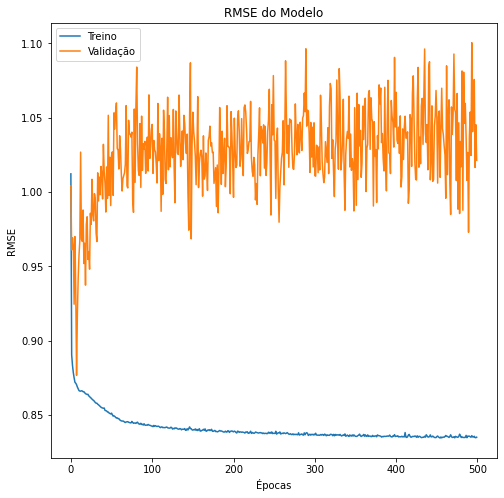

In [141]:
# Gráfico com a evolução do treinamento
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(historico.history['root_mean_squared_error'])
plt.plot(historico.history['val_root_mean_squared_error'])
plt.title('RMSE do Modelo')
plt.ylabel('RMSE')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

RMSE no conjunto de Treino: 0.95
RMSE no conjunto de Teste: 2.4


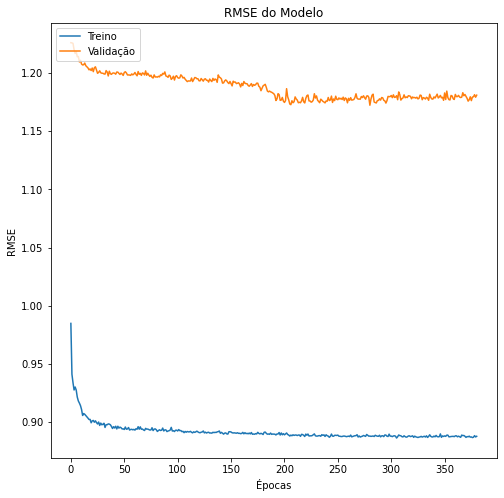

In [144]:
# Definição da estrutura do modelo
modelo_baseline = keras.Sequential()

# Camada de Entrada
modelo_baseline.add(layers.Dropout(0.1,
                                   input_shape = (x_train_scaled.shape[1],)))

# Camada(s) Oculta(s)
modelo_baseline.add(layers.Dense(20, 
                                 activation = 'relu',
                                 kernel_initializer = keras.initializers.GlorotUniform(),
                                 kernel_regularizer = keras.regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4)))
modelo_baseline.add(layers.Dropout(0.2))

# Camada de Saída
modelo_baseline.add(layers.Dense(1, activation = 'relu'))

# Configurações de Otimização
modelo_baseline.compile(loss = 'mean_squared_error', 
                        optimizer = keras.optimizers.Adam(),
                        metrics = keras.metrics.RootMeanSquaredError())

# Definição do Early Stopping
callback = keras.callbacks.EarlyStopping(monitor = 'val_root_mean_squared_error', 
                                         patience = 100)

# Treinamento com o conjunto de Treino
n_epochs = 500
n_batchs = 100
hist_baseline = modelo_baseline.fit(x = x_train_scaled, 
                                    y = y_train_scaled, 
                                    epochs = n_epochs,
                                    batch_size = n_batchs,
                                    validation_split = 0.2,
                                    callbacks = callback,
                                    verbose = 0)


# Análise de desempenho
score_train, rmse_train = modelo_baseline.evaluate(x_train_scaled, y_train_scaled, verbose=0)
score_test, rmse_test = modelo_baseline.evaluate(x_test_scaled, y_test_scaled, verbose=0)

print('RMSE no conjunto de Treino: {:.2}'.format(rmse_train))
print('RMSE no conjunto de Teste: {:.2}'.format(rmse_test))


# Gráfico com a evolução do treinamento
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(hist_baseline.history['root_mean_squared_error'])
plt.plot(hist_baseline.history['val_root_mean_squared_error'])
plt.title('RMSE do Modelo')
plt.ylabel('RMSE')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()


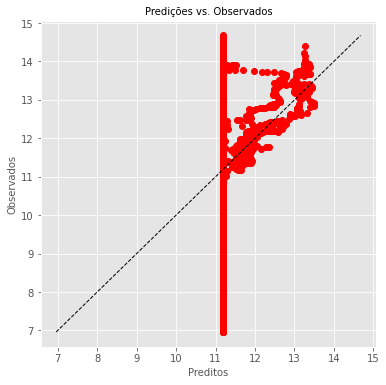

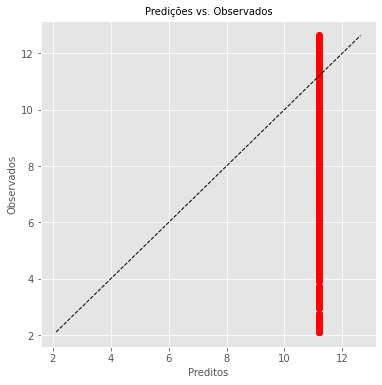

RMSE Treino:  2.0279508527712182
RMSE Teste:  5.029295419617736


In [151]:
def dispersao_modelo(y_pred, y_obs):
    plt.style.use('ggplot')
    
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    fig, ax = plt.subplots(figsize=(6, 6))
    
    plt.plot(y_pred, y_obs, 'ro')
    plt.xlabel('Preditos', fontsize = 10)
    plt.ylabel('Observados', fontsize = 10)
    plt.title('Predições vs. Observados', fontsize = 10)
    ax.plot([y_obs.min(), y_obs.max()], [y_obs.min(), y_obs.max()], 'k--', lw=1)
    plt.show()

y_train_pred = y_scaler.inverse_transform(modelo_baseline.predict(x_train_scaled))
y_test_pred = y_scaler.inverse_transform(modelo_baseline.predict(x_test_scaled))

dispersao_modelo(y_train_pred, y_train)
dispersao_modelo(y_test_pred, y_test)



# Avaliação do melhor modelo
print('RMSE Treino: ', sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE Teste: ', sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

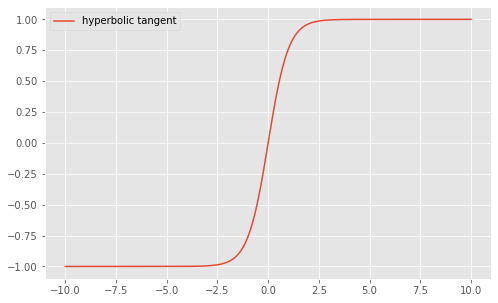

In [165]:
x = np.linspace(-10, 10, 1000)
y = ( 2 / (1 + np.exp(-2*x) ) ) -1

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x, y)
plt.legend(['hyperbolic tangent'])
plt.show()
fig.savefig('hyperbolic_tangent.pdf', bbox_inches='tight')

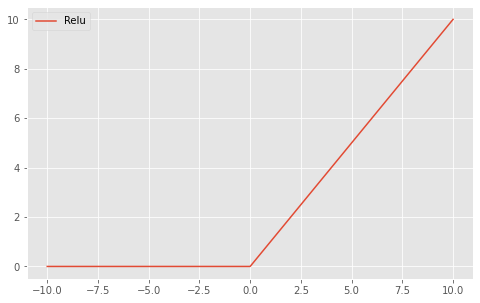

In [167]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()
fig.savefig('relu.pdf', bbox_inches='tight')